In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score as R2
from sklearn.metrics import mean_squared_error as MSE

In [2]:
rest = pd.read_csv('/Volumes/Database/Research/ozone-budget/result_df_UKESM1_3_0_NN_width_64_dropout_0.1_90.csv')
data = pd.read_csv('/Volumes/Database/Research/C7 Multivariate analysis/UKESM1-0-LL_diag_2014(0301).csv')

In [3]:
country = pd.read_csv('/Users/csuen/Desktop/PhD/Maps/country_province_state_2*2.csv')
data = data.merge(country, how = 'left', left_on = ['longitude','latitude'], right_on = ['longitude','latitude'])
data = data.drop(['province','state'], axis=1)
data = data.dropna()

### First, converse the concentrations in ppb to molecules cm${^{-3}}$

In [4]:
data['o3_mole'] = data['o3']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['no_mole'] = data['no']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['no2_mole'] = data['no2']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['oh_mole'] = data['oh']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['h2o_mole'] = data['h2o']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['hno3_mole'] = data['hno3']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['pan_mole'] = data['pan']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)

data['k_ho2_ho2'] = 2.2*10**(-13)*np.exp(600/data['tas'])
data['k_oh_no2'] = 6.5*10**(-11)
data['k_o1d_h2o'] = 2.14*10**(-10)

data['o3prod_mole'] = data['o3prod']*6.022*10**17
data['o3loss_mole'] = data['o3loss']*6.022*10**17

data['lossch4_mole'] = data['lossch4']*6.022*10**17
data['k_ch3o2_ch3o2'] = 1.03*10**(-13)*np.exp(365/data['tas'])

In [5]:
data['k_no_ho2'].median()

8.836104083061217e-12

In [6]:
data['k_no_ch3o2'].median()

8.551789188385009e-12

In [7]:
data['k_o3_oh'].median()

5.5113271810114386e-14

In [8]:
data['k_o3_ho2'].median()

1.6842960464228366e-15

In [9]:
data['k_ch3o2_ch3o2'].median()

3.900206258635662e-13

In [10]:
data['a'] = 2*data['k_ch3o2_ch3o2']
data['b'] = data['k_no_ch3o2']*data['no_mole']
data['c'] = -data['lossch4_mole']

In [11]:
data['ch3o2_mole'] = (-data['b'] + np.sqrt(data['b']**2 - 4*data['a']*data['c']))/(2*data['a'])

In [12]:
data['P2'] = data['k_no_ch3o2']*data['no_mole']*data['ch3o2_mole']
data['P2_frac'] = data['P2']/data['o3prod_mole']
data['P2_frac'].describe()

count    322140.000000
mean          0.239856
std           0.278983
min           0.002488
25%           0.070300
50%           0.142480
75%           0.360589
max           9.979769
Name: P2_frac, dtype: float64

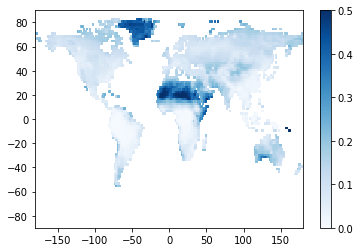

In [13]:
data['loc'] = data['longitude']*1000 + data['latitude']
data_land = data.dropna()
data_land = data_land[data_land['latitude'] >= -60]
data_land = data_land[data_land['P2_frac'] <1]
data_mean = data_land.groupby(['loc']).mean()

cm = plt.cm.get_cmap('Blues')
x = data_mean['longitude']
y = data_mean['latitude']
z = data_mean['P2_frac']
sc = plt.scatter(x, y, c=z, marker="s", vmin=0, vmax=0.5, s=3, cmap=cm)
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.colorbar(sc)
plt.show()

In [14]:
data_mean['P2_frac'].describe()

count    3869.000000
mean        0.128894
std         0.105426
min         0.004239
25%         0.064408
50%         0.101492
75%         0.158286
max         0.801294
Name: P2_frac, dtype: float64

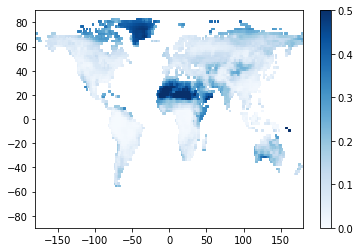

In [15]:
data['loc'] = data['longitude']*1000 + data['latitude']
data_land = data.dropna()
data_land = data_land[data_land['latitude'] >= -60]
data_land = data_land[data_land['P2_frac'] <1]
data_JJA = data_land[data_land['t'] >52]
data_JJA = data_JJA[data_JJA['t'] <56]
data_JJA = data_JJA.groupby(['loc']).mean()

cm = plt.cm.get_cmap('Blues')
x = data_JJA['longitude']
y = data_JJA['latitude']
z = data_JJA['P2_frac']
sc = plt.scatter(x, y, c=z, marker="s", vmin=0, vmax=0.5, s=3, cmap=cm)
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.colorbar(sc)
plt.show()

In [16]:
data_JJA['P2_frac'].describe()

count    3869.000000
mean        0.138038
std         0.125935
min         0.004791
25%         0.049161
50%         0.094133
75%         0.187042
max         0.860992
Name: P2_frac, dtype: float64

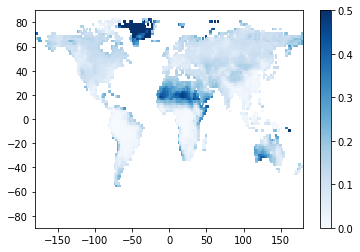

In [17]:
data['loc'] = data['longitude']*1000 + data['latitude']
data_land = data.dropna()
data_land = data_land[data_land['latitude'] >= -60]
data_land = data_land[data_land['P2_frac'] <1]
data_DJF = data_land[data_land['t'] >46]
data_DJF = data_DJF[data_DJF['t'] <50]
data_DJF = data_DJF.groupby(['loc']).mean()

cm = plt.cm.get_cmap('Blues')
x = data_DJF['longitude']
y = data_DJF['latitude']
z = data_DJF['P2_frac']
sc = plt.scatter(x, y, c=z, marker="s", vmin=0, vmax=0.5, s=3, cmap=cm)
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.colorbar(sc)
plt.show()

In [18]:
data_DJF['P2_frac'].describe()

count    3838.000000
mean        0.126830
std         0.125543
min         0.003619
25%         0.059153
50%         0.101960
75%         0.143275
max         0.998591
Name: P2_frac, dtype: float64

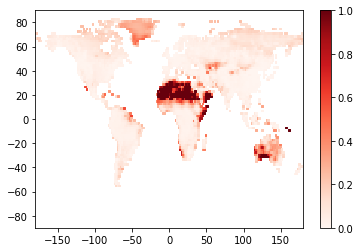

In [22]:
data['loc'] = data['longitude']*1000 + data['latitude']
data_land = data.dropna()
data_land = data_land[data_land['latitude'] >= -60]
data_mean = data_land.groupby(['loc']).mean()

cm = plt.cm.get_cmap('Reds')
x = data_mean['longitude']
y = data_mean['latitude']
z = data_mean['ch3o2_mole']*10**(-8)
sc = plt.scatter(x, y, c=z, marker="s", vmin=0, vmax=1, s=3, cmap=cm)
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.colorbar(sc)
plt.show()